# Image Processing


In [14]:
import numpy as np
import cv2 as cv 
import sys
import matplotlib.pyplot as plt


## Change Color Spaces

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two, which are most widely used ones: BGR ↔ Gray and BGR ↔ HSV.

For color conversion, we use the function `cv2.cvtColor(input_image, flag)` where flag determines the type of conversion.

- for BGR → Gray conversion we use the flags `cv2.COLOR_BGR2GRAY`.
- for BGR → HSV, we use the flag `cv2.COLOR_BGR2HSV`.

To get other flags, just run following commands in your Python terminal:


**Note:**

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

In [12]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

## Object Tracking

Object tracking uses HGV color space to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object. So here is the method:

- Take each frame of the video
- Convert from BGR to HSV color-space
- We threshold the HSV image for a range of red color
- Now extract the blue object alone, we can do whatever on that image we want.


In [8]:
# need get hsv value of a specific object: this is from: https://answers.opencv.org/question/134248/how-to-define-the-lower-and-upper-range-of-a-color/
image_hsv = None   # global ;(
pixel = (20,60,80) # some stupid default

# mouse callback function
def pick_color(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDOWN:
        pixel = image_hsv[y,x]

        #you might want to adjust the ranges(+-10, etc):
        upper =  np.array([pixel[0] + 10, pixel[1] + 10, pixel[2] + 80])
        lower =  np.array([pixel[0] - 10, pixel[1] - 10, pixel[2] - 80])
        print(pixel, lower, upper)

        image_mask = cv.inRange(image_hsv,lower,upper)
        cv.imshow("mask",image_mask)

image_src = cv.imread('ball.jpg')  # pick.py my.png
if image_src is None:
    print ("the image read is None............")

cv.imshow("bgr",image_src)

## NEW ##
cv.namedWindow('hsv')
cv.setMouseCallback('hsv', pick_color)

# now click into the hsv img , and look at values:
image_hsv = cv.cvtColor(image_src,cv.COLOR_BGR2HSV)
cv.imshow("hsv",image_hsv)

cv.waitKey(0)
cv.destroyAllWindows()

[  2 186 201] [ -8 176 121] [ 12 196 281]
[  0 208 162] [-10 198  82] [ 10 218 242]


In [9]:

# capture video from camera
cap = cv.VideoCapture(0)

while 1:
    # take each frame
    _, frame = cap.read()

    # convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # define range of red color in HSV: (Hue, Saturation, Value)
    lower_red = np.array([0, 180, 80])
    upper_red = np.array([10, 220, 255])

    # threshold the HSV image to get only red colors
    mask = cv.inRange(hsv, lower_red, upper_red)

    # bitwise-AND mask and original image
    res = cv.bitwise_and(frame, frame, mask=mask)

    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)
    # wait for ESC key to exit
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()


Note the simple lower and upper bound results in noisy output. We can improve this later.


How to track multiple objects in different colors?


In [7]:
# get hsv for ball color and pen color
image_src = cv.imread('pen.jpg')  # pick.py my.png

cv.imshow("bgr",image_src)
## NEW ##
cv.namedWindow('hsv')
cv.setMouseCallback('hsv', pick_color)

# now click into the hsv img , and look at values:
image_hsv = cv.cvtColor(image_src,cv.COLOR_BGR2HSV)
cv.imshow("hsv",image_hsv)

cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
cap = cv.VideoCapture(0)

while 1:
    # read frame
    _, frame = cap.read()

    # convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # define range of red color in HSV
    lower_red = np.array([0, 180, 80])
    upper_red = np.array([10, 220, 255])

    # defien range of yellow color in HSC
    lower_white = np.array([19, 127, 168])
    upper_white = np.array([39, 147, 255])

    # threshold the HSV image to get only the red nad white colors
    mask_red = cv.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv.inRange(hsv, lower_white, upper_white)

    # bitwise-AND mask and original image
    res_red = cv.bitwise_and(frame, frame, mask=mask_red)
    res_yellow = cv.bitwise_and(frame, frame, mask=mask_yellow)

    # add both masks
    res = cv.add(res_red, res_yellow)
    
    cv.imshow('frame', frame)
    cv.imshow('mask_red', mask_red)
    cv.imshow('mask_white', mask_yellow)
    cv.imshow('res', res)
    # wait for ESC key to exit
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()



## Geometric Transformations of Images

OpenCV provides two transformation functions, `cv.warpAffine` and `cv.warpPerspective`, with which you can perform all kinds of transformations. 
- `cv.warpAffine` takes a 2x3 transformation matrix 
- `cv.warpPerspective` takes a 3x3 transformation matrix as input 



### Scaling

Scaling is just resizing of the image. OpenCV comes with a function `cv.resize()` for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are `cv.INTER_AREA` for shrinking and `cv.INTER_CUBIC` (slow) & `cv.INTER_LINEAR` for zooming. By default, interpolation method used is `cv.INTER_LINEAR` for all resizing purposes. You can resize an input image either of following methods:


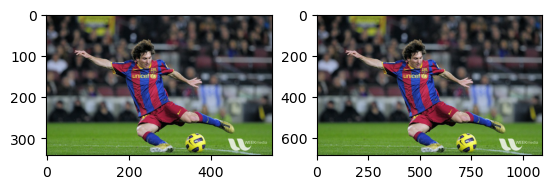

In [19]:
img = cv.imread('messi5.jpg')
img_scaled = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

plt.subplot(1,2,1)
plt.imshow(img[:,:, ::-1])

plt.subplot(1,2,2)
plt.imshow(img_scaled[:,:, ::-1])

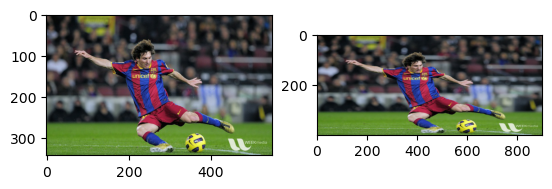

In [20]:
# or
img_scaled = cv.resize(img, (900, 400), interpolation=cv.INTER_AREA)

plt.subplot(1,2,1)
plt.imshow(img[:,:, ::-1])

plt.subplot(1,2,2)
plt.imshow(img_scaled[:,:, ::-1])

## Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix `M` as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

You can take make it into a Numpy array of type `np.float32` and pass it into `cv.warpAffine()` function. See below example for a shift of (100,50):


In [22]:
img = cv.imread('messi5.jpg')
rows, cols, channels = img.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### Rotation
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form

$$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$\begin{bmatrix} \alpha & \beta & (1- \alpha )  \cdot center.x - \beta \cdot center.y \\ -\beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$

where:

$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check below example which rotates the image by 90 degree with respect to center without any scaling.


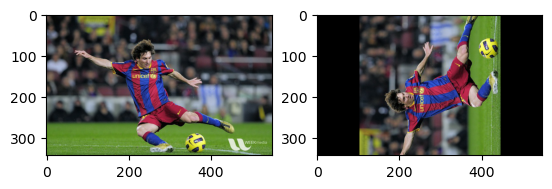

In [32]:
img = cv.imread('messi5.jpg')
rows, cols, channels = img.shape

M = cv.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(1,2,1)
plt.imshow(img[:,:, ::-1])

plt.subplot(1,2,2)
plt.imshow(dst[:,:, ::-1])

### Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.



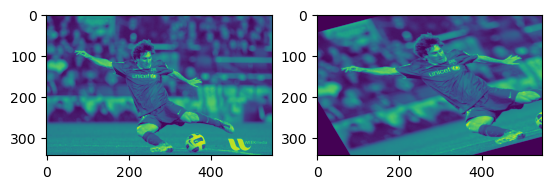

In [39]:
img = cv.imread('messi5.jpg', 0)
rows, cols = img.shape

# get affine transform matrix
src_points = np.float32([[50,50],[200,50],[50,200]])
dst_points = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(src_points, dst_points)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(dst[:,:])

### Projective Transformation